# Problem Statement

This project aims to delve into the dynamic and evolving nature of Voronoi diagrams, extending the conventional
concept to accommodate continuously moving points within a 2D plane. Unlike traditional Voronoi diagrams, where
static points define fixed regions, this endeavor seeks to create a dynamic representation that adapts to the continuous
movement of points over time.

# Related Work

Traditionally, C++ has been the base language for implementing intricate geometric algorithms, and Fortune’s algorithm utilizing the parabolic front technique is no exception. Concurrently, the Python programming language offers an extensive set of libraries. Notably, the scipy library incorporates an in-built function for Voronoi diagram computation

# Importing necessary libraries

In [21]:
# Numpy is used for numerical operations
import numpy as np
# Matplotlib is used for plotting
import matplotlib.pyplot as plt
# os is a way of reading and writing files in system
import os
import seaborn as sns
# FuncAnimation is to create animations
from matplotlib.animation import FuncAnimation
# PIL is for working with images
from PIL import Image
# random is for generating random numbers
import random
# Mathematical functions module
import math

In [22]:
# Specifically for fortune's algorithm
# Heap queue algorihtms need heapq
import heapq
# To work with iterator functions
import itertools
# tkinter is for creating GUI applications
import tkinter as tk

In [23]:
# Specifically for Dynamic Voronoi Implementation
# Perlin noise generation
from perlin import Perlin
# function to calculate the voronoi of given points
from scipy.spatial import Voronoi, voronoi_plot_2d

# Brute Force Algorithm

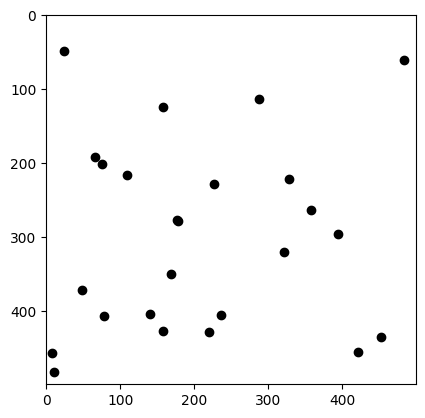

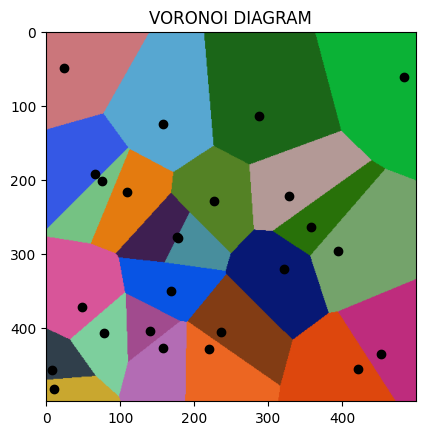

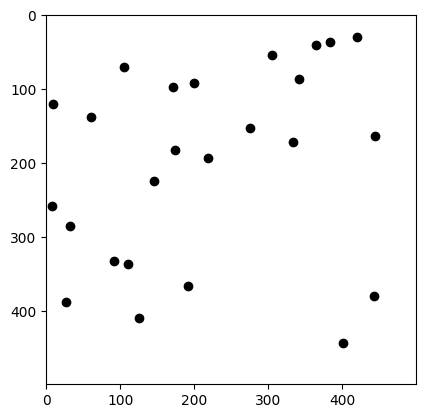

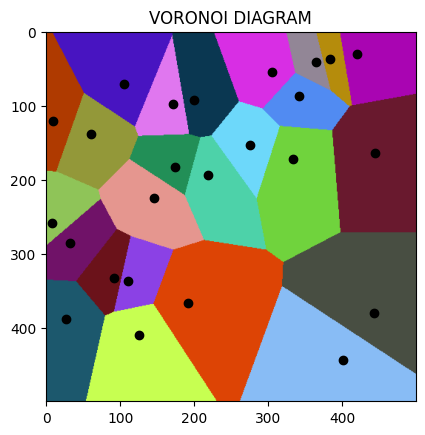

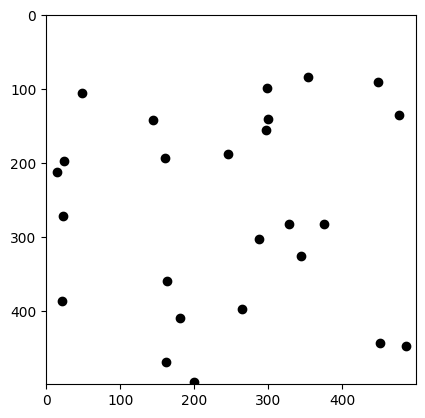

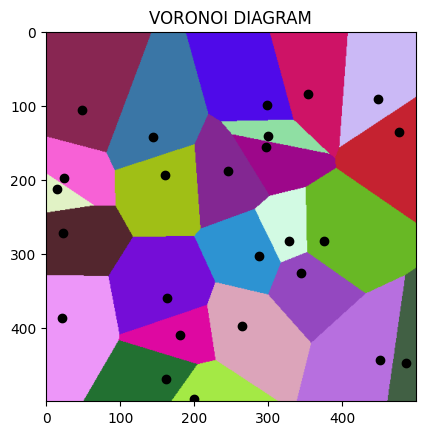

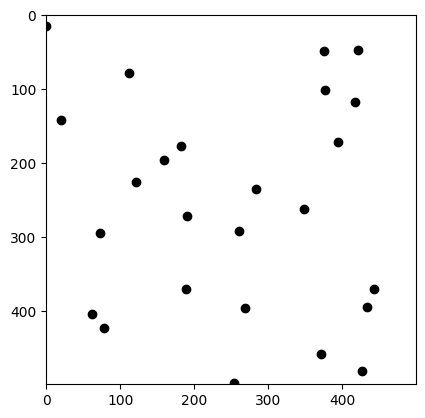

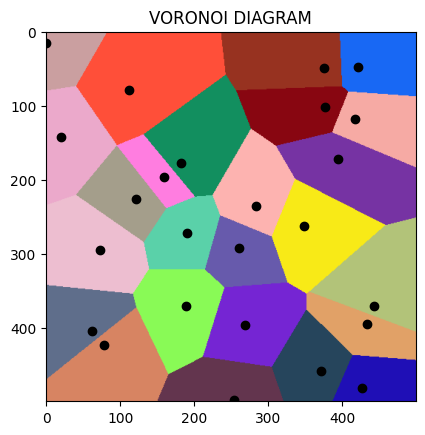

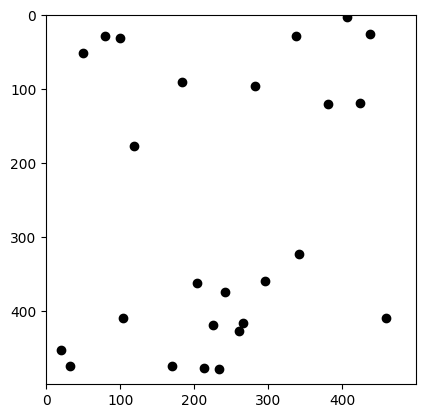

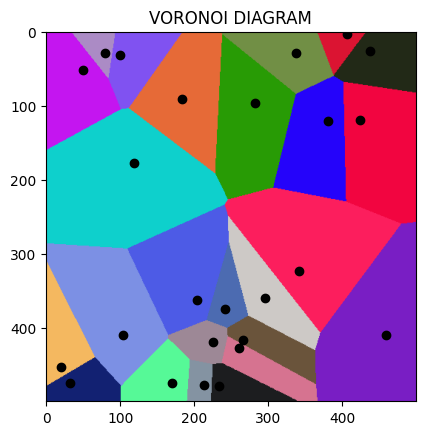

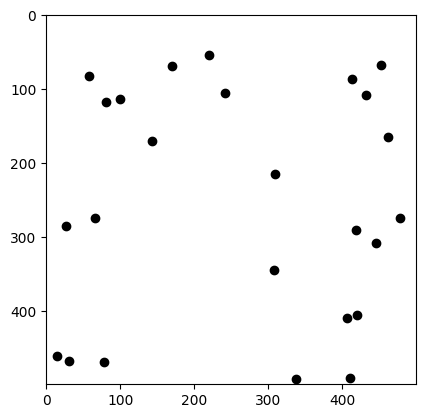

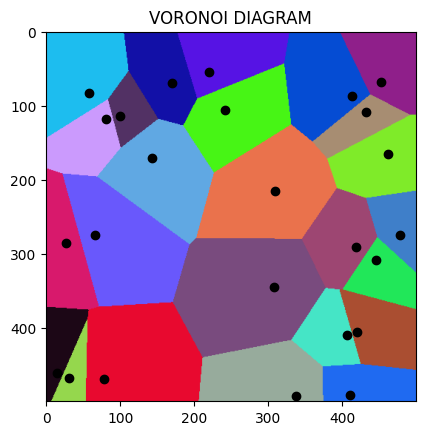

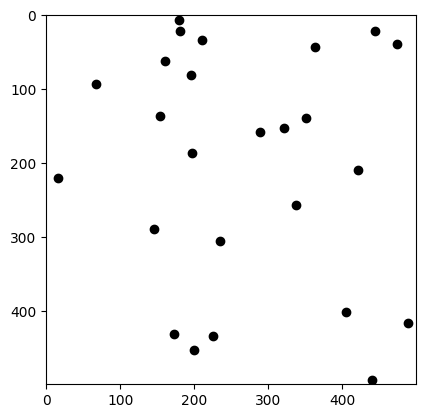

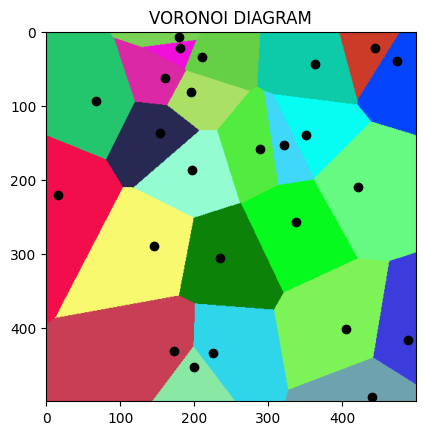

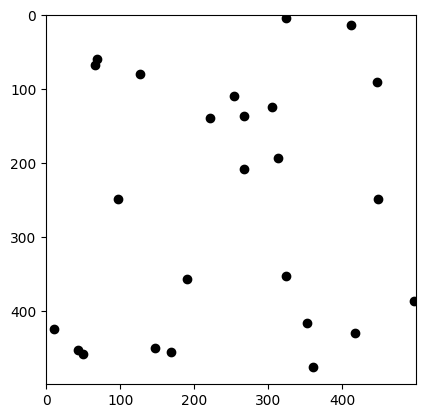

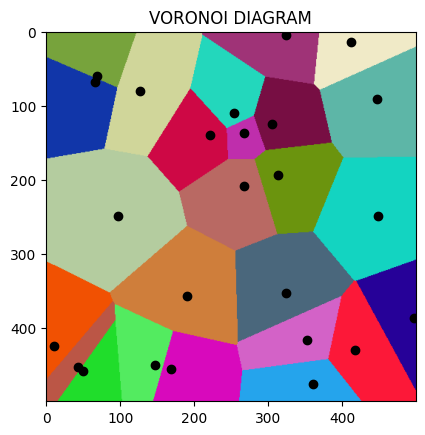

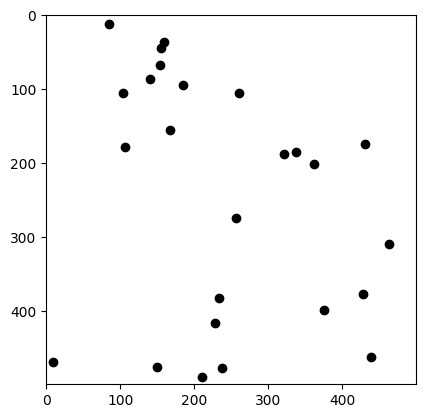

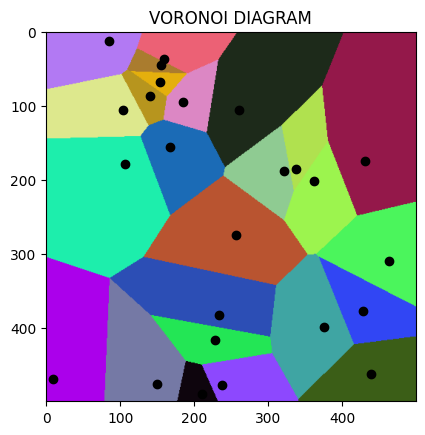

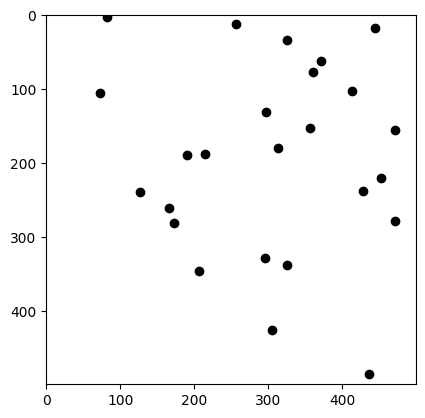

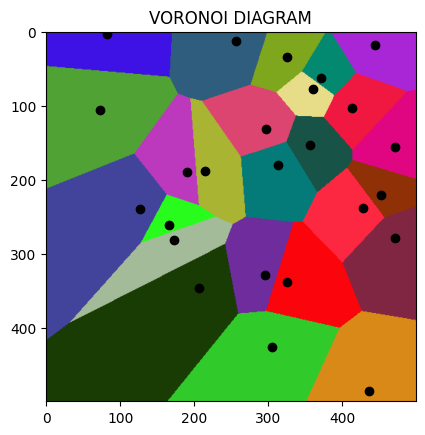

In [6]:
for alpha in range(10):
    def generate_voronoi_diagram(width, height, num_cells):
        # Generate a new RGB image with the given width and height
        image = Image.new("RGB", (width, height), color=(255,255,255))
        # Function to set the pixel color at a given location
        putpixel = image.putpixel
        # Get the size of the image
        imgx, imgy = image.size
        nx = []
        ny = []
        nr = []
        ng = []
        nb = []
        # Generate random cell coordinates and colors
        for i in range(num_cells):
            nx.append(random.randrange(imgx))
            ny.append(random.randrange(imgy))
            nr.append(random.randrange(256))
            ng.append(random.randrange(256))
            nb.append(random.randrange(256))

        # Plot the initial cell points
        plt.plot(nx,ny,"ko")
        plt.imshow(image)
        plt.show()

        # Loop through each pixel in the image
        for y in range(imgy):
            for x in range(imgx):
                # Initialize the minimum distance to the maximum distance possible
                dmin = math.hypot(imgx-1, imgy-1)
                # Index of closest cell to current pixel
                j = -1
                # Loop through each cell to find the closest one
                for i in range(num_cells):
                    # Calculate the Euclidean distance between the current cell and pixel
                    d = math.hypot(nx[i]-x, ny[i]-y)
                    # Update the minimum distance and index if the current cell is closer
                    if d < dmin:
                        dmin = d
                        j = i
                # Set the pixel color based on the closest cell's RGB values
                putpixel((x, y), (nr[j], ng[j], nb[j]))
        # Plot the final cell points
        plt.plot(nx,ny,"ko")
        # Display the voronoi diagram image
        plt.imshow(image)
        plt.title("VORONOI DIAGRAM")
        plt.savefig('C:\\Users\\Dell\\Desktop\\Courses\\Sem_V\\CompAlgo\\Project_Submission\\Generated Images\\Brute_Force_Algorithm\\Example_{}'.format(alpha))
        plt.show()

    # Generate one example with a specified width, height and number of cells
    generate_voronoi_diagram(500, 500, 25)

# Fortune's Algorithm

In [24]:
"""
Class representing a 2D point with the "x" and "y" coordinates
"""
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

In [25]:
"""
Class representing an event in the Fortune's algorithm.
An event occurs when the sweep line passes through a point or the vertex of a parabola.
"""
class Event:
    x = 0.0
    p = None # Corresponding point of the event
    a = None # Corresponding arc of the event
    valid = True # Flag indicating if the event is still valid
    def __init__(self, x, p, a):
        self.x = x
        self.p = p
        self.a = a
        self.valid = True

In [26]:
"""
Class representing an arc in the beach line.
The beach line is a representation of the parabolas that are intersected by the sweep line.
"""
class Arc:
    p = None # p corresponds point for the arc
    pprev = None # Previous arc in the beach line
    pnext = None # Next arc in the beach line
    e = None # Corresponding event for the arc
    s0 = None # Left edge of the arc
    s1 = None # Right edge of the arc
    def __init__(self, p=None, a=None, b=None):
        self.p = p
        self.pprev = a
        self.pnext = b
        self.e = None
        self.s0 = None
        self.s1 = None

In [27]:
"""
Class representing a line segment
Line segments refer to the edges of the Voronoi diagram
"""
class Segment:
    start = None # Starting point of the segment
    end = None # Ending point of the segment
    done = False # Flag indicating if the segment is finished
    def __init__(self, p):
        self.start = p
        self.end = None
        self.done = False
        
    def finish(self, p):
        if self.done:
            return
        self.end = p
        self.done = True

In [28]:
"""
Class to implement the priority queue using a heap.
This data structure is used to efficiently manage the events in the algorithm
The priority is determined by the "x" coordinates of the events
"""
class PriorityQueue:
    def __init__(self):
        self.pq = [] # Priority queue as a list
        self.entry_finder = {} # Dictionary to keep track of entries in the queue
        self.counter = itertools.count() # Counter to break ties when priorities are equal
    
    def push(self, item):
        # Push an element into the queue
    
        if item in self.entry_finder:  # Check for duplicates
            return
        count = next(self.counter)
        # Use the x-coordinate as a primary key
        # heapq in Python is a min-heap
        entry = [item.x, count, item]
        self.entry_finder[item] = entry
        heapq.heappush(self.pq, entry)
        
    def remove_entry(self, item):
        # remove the element from the list, (defined as a priority queue)
        entry = self.entry_finder.pop(item)
        entry[-1] = "Removed"
    
    def pop(self):
        # pop the element from the list, (defined as a priority queue)
        while self.pq:
            priority, count, item = heapq.heappop(self.pq)
            if item != "Removed":
                del self.entry_finder[item]
                return item
        # We need to raise an error whenever we try to pop an element from the empty list
        # This is mainy for the diagnostic purpose to evaluate the results
        raise KeyError('Empty Priority Queue')
    
    def top(self):
        # view the top element of the priority queue
        while self.pq:
            priority, count, item = heapq.heappop(self.pq)
            if item != "Removed":
                del self.entry_finder[item]
                self.push(item)
                return item
        # We need to raise an error whenever we try to view the top element in an empty list
        # This is mainy for the diagnostic purpose to evaluate the results
        raise KeyError('Empty Priority Queue')
    
    def empty(self):
        # Checks whether the list, (defined as a Priority Queue) is empty or not
        return not self.pq

In [29]:
class Voronoi:
    def __init__(self, points):
        # List to store the resulting Voronoi Diagram
        self.output = []
        # Root of the parabolic front represented as linked list
        self.arc = None
        
        self.points = PriorityQueue() # site events
        self.event = PriorityQueue() # circle events
        
        # The external bounding box coordinates
        self.x0 = -50.0
        self.x1 = -50.0
        self.y0 = 550.0
        self.y1 = 550.0
        
        # Insert points to site events
        for pts in points:
            point = Point(pts[0], pts[1])
            self.points.push(point)
            # In order to keep track of bounding box size
            if point.x < self.x0:
                self.x0 = point.x
            if point.y < self.y0:
                self.y0 = point.y
            if point.x > self.x1:
                self.x1 = point.x
            if point.y > self.y1:
                self.y1 = point.y
                
        # Add margins to the bounding box
        dx = (self.x1 - self.x0 + 1) / 5.0
        dy = (self.y1 - self.y0 + 1) / 5.0
        self.x0 = self.x0 - dx
        self.x1 = self.x1 + dx
        self.y0 = self.y0 - dy
        self.y1 = self.y1 + dy
    
    def process(self):
        while not self.points.empty():
            if not self.event.empty() and (self.event.top().x <= self.points.top().x):
                self.process_event() # handle circle event
            else:
                self.process_point() # handle site event

        # after all points, process remaining circle events
        while not self.event.empty():
            self.process_event()

        self.finish_edges()
        
    def process_point(self):
        # get next event from site pq
        p = self.points.pop()
        # add new arc (parabola)
        self.arc_insert(p)
    
    def process_event(self):
        # get next event from circle pq
        e = self.event.pop()

        if e.valid:
            # start new edge
            s = Segment(e.p)
            self.output.append(s)

            # remove associated arc (parabola)
            a = e.a
            if a.pprev is not None:
                a.pprev.pnext = a.pnext
                a.pprev.s1 = s
            if a.pnext is not None:
                a.pnext.pprev = a.pprev
                a.pnext.s0 = s

            # finish the edges before and after a
            if a.s0 is not None: a.s0.finish(e.p)
            if a.s1 is not None: a.s1.finish(e.p)

            # recheck circle events on either side of p
            if a.pprev is not None: self.check_circle_event(a.pprev, e.x)
            if a.pnext is not None: self.check_circle_event(a.pnext, e.x)
    
    def arc_insert(self, p):
        if self.arc is None:
            self.arc = Arc(p)
        else:
            # find the current arcs at p.y
            i = self.arc
            while i is not None:
                flag, z = self.intersect(p, i)
                if flag:
                    # new parabola intersects arc i
                    flag, zz = self.intersect(p, i.pnext)
                    if (i.pnext is not None) and (not flag):
                        i.pnext.pprev = Arc(i.p, i, i.pnext)
                        i.pnext = i.pnext.pprev
                    else:
                        i.pnext = Arc(i.p, i)
                    i.pnext.s1 = i.s1

                    # add p between i and i.pnext
                    i.pnext.pprev = Arc(p, i, i.pnext)
                    i.pnext = i.pnext.pprev

                    i = i.pnext # now i points to the new arc

                    # add new half-edges connected to i's endpoints
                    seg = Segment(z)
                    self.output.append(seg)
                    i.pprev.s1 = i.s0 = seg

                    seg = Segment(z)
                    self.output.append(seg)
                    i.pnext.s0 = i.s1 = seg

                    # check for new circle events around the new arc
                    self.check_circle_event(i, p.x)
                    self.check_circle_event(i.pprev, p.x)
                    self.check_circle_event(i.pnext, p.x)

                    return
                        
                i = i.pnext

            # if p never intersects an arc, append it to the list
            i = self.arc
            while i.pnext is not None:
                i = i.pnext
            i.pnext = Arc(p, i)
            
            # insert new segment between p and i
            x = self.x0
            y = (i.pnext.p.y + i.p.y) / 2.0;
            start = Point(x, y)

            seg = Segment(start)
            i.s1 = i.pnext.s0 = seg
            self.output.append(seg)
    
    def check_circle_event(self, i, x0):
        # look for a new circle event for arc i
        if (i.e is not None) and (i.e.x  != self.x0):
            i.e.valid = False
        i.e = None

        if (i.pprev is None) or (i.pnext is None): return

        flag, x, o = self.circle(i.pprev.p, i.p, i.pnext.p)
        if flag and (x > self.x0):
            i.e = Event(x, o, i)
            self.event.push(i.e)
            
    def circle(self, a, b, c):
        # check if bc is a "right turn" from ab
        if ((b.x - a.x)*(c.y - a.y) - (c.x - a.x)*(b.y - a.y)) > 0: return False, None, None

        A = b.x - a.x
        B = b.y - a.y
        C = c.x - a.x
        D = c.y - a.y
        E = A*(a.x + b.x) + B*(a.y + b.y)
        F = C*(a.x + c.x) + D*(a.y + c.y)
        G = 2*(A*(c.y - b.y) - B*(c.x - b.x))

        if (G == 0): return False, None, None # Points are co-linear

        # point o is the center of the circle
        ox = 1.0 * (D*E - B*F) / G
        oy = 1.0 * (A*F - C*E) / G

        # o.x plus radius equals max x coord
        x = ox + math.sqrt((a.x-ox)**2 + (a.y-oy)**2)
        o = Point(ox, oy)
           
        return True, x, o
    
    def intersect(self, p, i):
        # check whether a new parabola at point p intersect with arc i
        if (i is None): return False, None
        if (i.p.x == p.x): return False, None

        a = 0.0
        b = 0.0

        if i.pprev is not None:
            a = (self.intersection(i.pprev.p, i.p, 1.0*p.x)).y
        if i.pnext is not None:
            b = (self.intersection(i.p, i.pnext.p, 1.0*p.x)).y

        if (((i.pprev is None) or (a <= p.y)) and ((i.pnext is None) or (p.y <= b))):
            py = p.y
            px = 1.0 * ((i.p.x)**2 + (i.p.y-py)**2 - p.x**2) / (2*i.p.x - 2*p.x)
            res = Point(px, py)
            return True, res
        return False, None
    
    def intersection(self, p0, p1, l):
        # get the intersection of two parabolas
        p = p0
        if (p0.x == p1.x):
            py = (p0.y + p1.y) / 2.0
        elif (p1.x == l):
            py = p1.y
        elif (p0.x == l):
            py = p0.y
            p = p1
        else:
            # use quadratic formula
            z0 = 2.0 * (p0.x - l)
            z1 = 2.0 * (p1.x - l)

            a = 1.0/z0 - 1.0/z1;
            b = -2.0 * (p0.y/z0 - p1.y/z1)
            c = 1.0 * (p0.y**2 + p0.x**2 - l**2) / z0 - 1.0 * (p1.y**2 + p1.x**2 - l**2) / z1

            py = 1.0 * (-b-math.sqrt(b*b - 4*a*c)) / (2*a)
            
        px = 1.0 * (p.x**2 + (p.y-py)**2 - l**2) / (2*p.x-2*l)
        res = Point(px, py)
        return res
    
    def finish_edges(self):
        l = self.x1 + (self.x1 - self.x0) + (self.y1 - self.y0)
        i = self.arc
        while i.pnext is not None:
            if i.s1 is not None:
                p = self.intersection(i.p, i.pnext.p, l*2.0)
                i.s1.finish(p)
            i = i.pnext
            
    def print_output(self):
        it = 0
        for o in self.output:
            it = it + 1
            p0 = o.start
            p1 = o.end
            print (p0.x, p0.y, p1.x, p1.y)

    def get_output(self):
        res = []
        for o in self.output:
            p0 = o.start
            p1 = o.end
            res.append((p0.x, p0.y, p1.x, p1.y))
        return res

# Plotting a Voronoi diagram in GUI

In [31]:
import tkinter as tk

class MainWindow:
    # radius of drawn points on canvas
    RADIUS = 3

    # flag to lock the canvas when drawn
    LOCK_FLAG = False
    
    def __init__(self, master):
        self.master = master
        self.master.title("Voronoi")

        self.frmMain = tk.Frame(self.master, relief=tk.RAISED, borderwidth=1)
        self.frmMain.pack(fill=tk.BOTH, expand=1)

        self.w = tk.Canvas(self.frmMain, width=500, height=500)
        self.w.config(background='white')
        self.w.bind('<Double-1>', self.onDoubleClick)
        self.w.pack()       

        self.frmButton = tk.Frame(self.master)
        self.frmButton.pack()
        
        self.btnCalculate = tk.Button(self.frmButton, text='Calculate', width=25, command=self.onClickCalculate)
        self.btnCalculate.pack(side=tk.LEFT)
        
        self.btnClear = tk.Button(self.frmButton, text='Clear', width=25, command=self.onClickClear)
        self.btnClear.pack(side=tk.LEFT)
        
    def onClickCalculate(self):
        if not self.LOCK_FLAG:
            self.LOCK_FLAG = True
        
            pObj = self.w.find_all()
            points = []
            for p in pObj:
                coord = self.w.coords(p)
                points.append((coord[0]+self.RADIUS, coord[1]+self.RADIUS))

            vp = Voronoi(points)
            vp.process()
            lines = vp.get_output()
            self.drawLinesOnCanvas(lines)\

    def onClickClear(self):
        self.LOCK_FLAG = False
        self.w.delete(tk.ALL)

    def onDoubleClick(self, event):
        if not self.LOCK_FLAG:
            self.w.create_oval(event.x-self.RADIUS, event.y-self.RADIUS, event.x+self.RADIUS, event.y+self.RADIUS, fill="black")

    def drawLinesOnCanvas(self, lines):
        for l in lines:
            self.w.create_line(l[0], l[1], l[2], l[3], fill='blue')
        
def main(): 
    root = tk.Tk()
    app = MainWindow(root)
    root.mainloop()

if __name__ == '__main__':
    main()


# Inbuilt Function to implement Voronoi Diagram

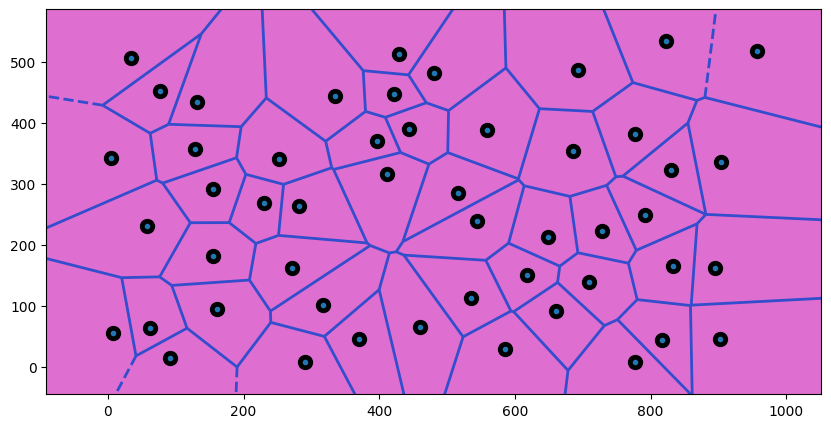

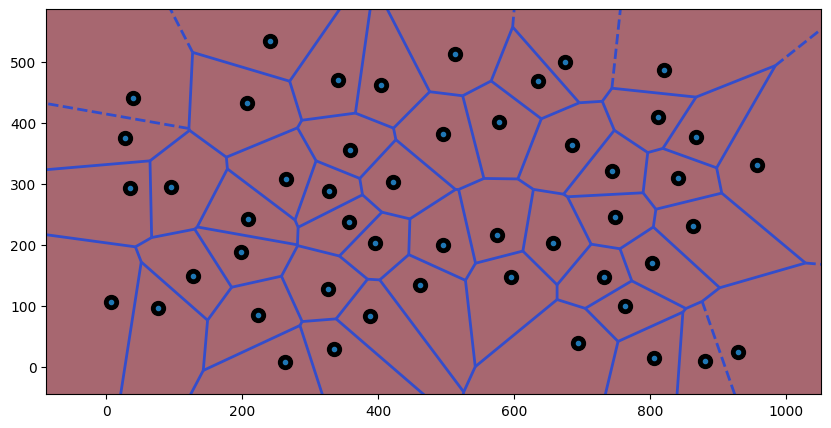

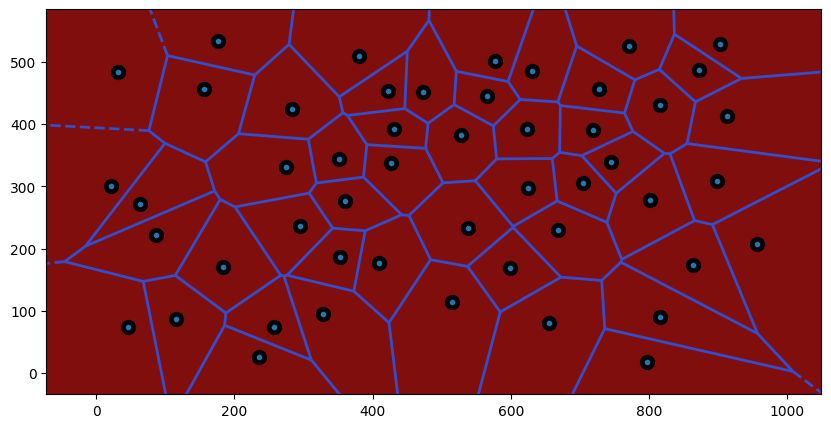

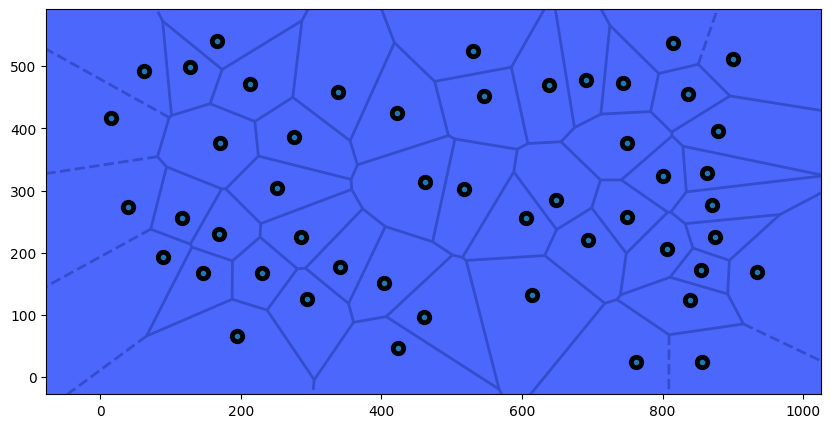

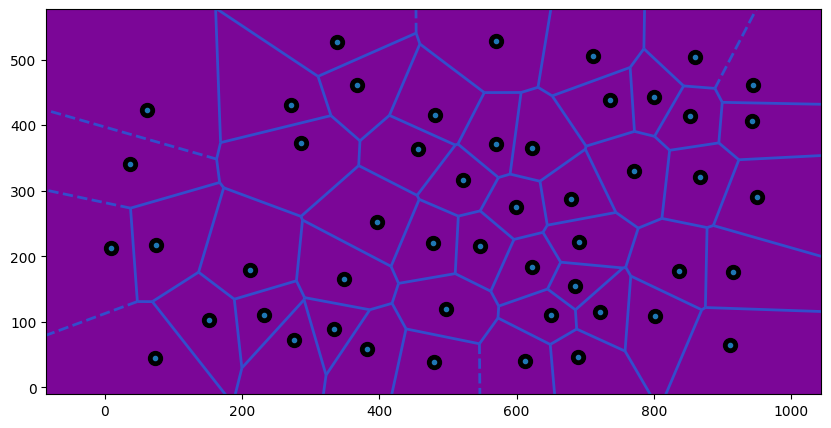

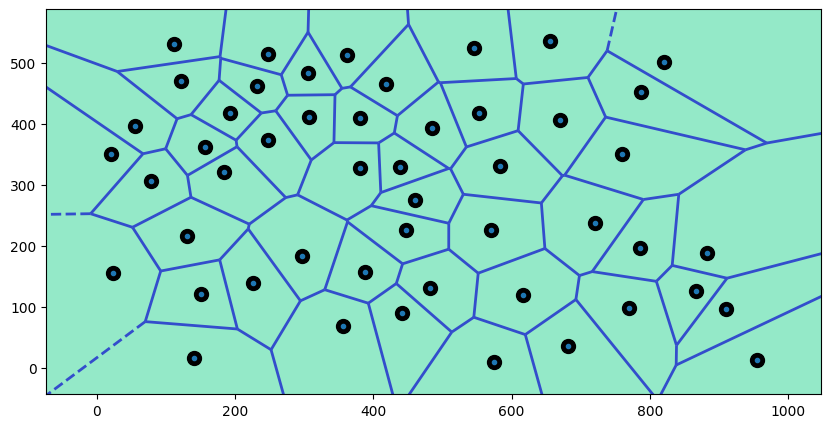

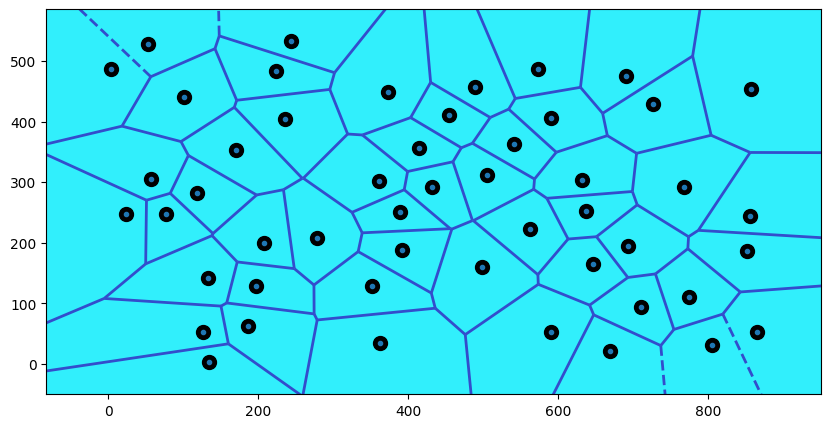

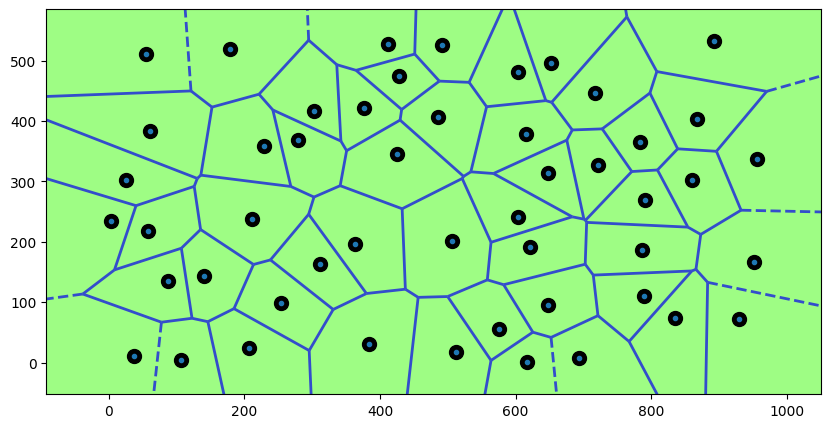

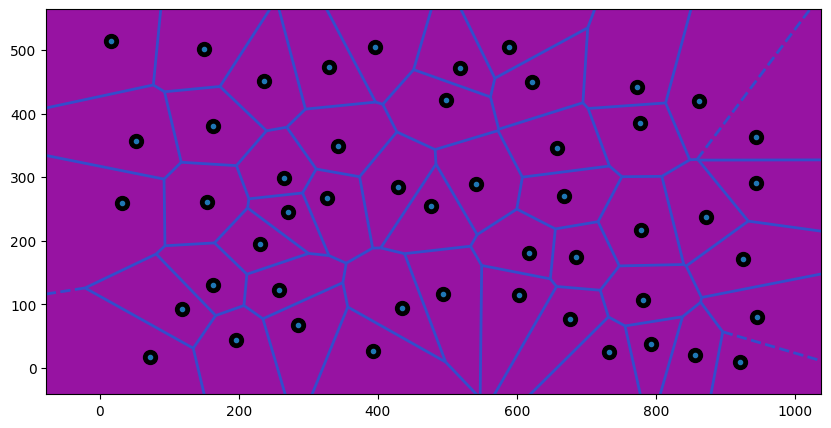

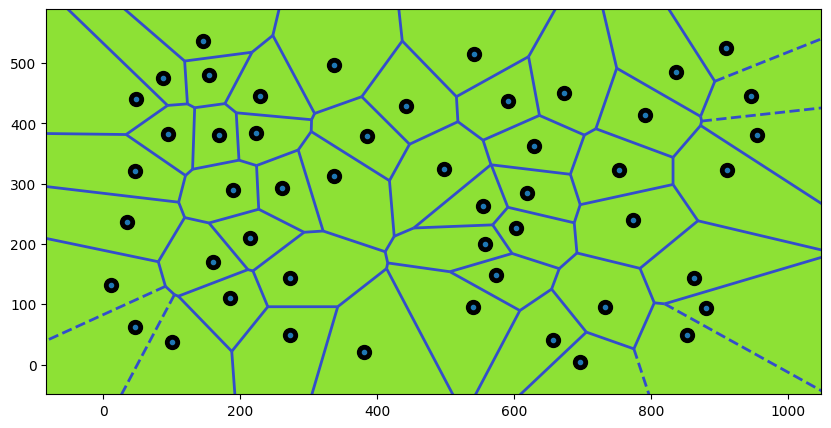

In [47]:
import random
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# SETTINGS
n_dots = 50
background_color = (0.8, 0.7, 0.8)
dots_color = (0.2, 0.3, 0.8)
min_distance = 50  # Minimum distance between dots

# Display part
display_width = 960
display_height = 540

def create_dots(ax):
    dots = []
    for i in range(n_dots):
        while True:
            rand_pos = (random.uniform(0, display_width), random.uniform(0, display_height))
            if all(np.linalg.norm(np.array(rand_pos) - np.array(existing_pos)) >= min_distance for existing_pos in dots):
                dots.append(rand_pos)
                break
    return dots

def main():
    for alpha in range(10,20):
        fig, ax = plt.subplots(figsize=(10, 5))
        dots = create_dots(ax)

        vor = Voronoi(dots)

        ax.set_xlim(0, display_width)
        ax.set_ylim(0, display_height)
        ax.set_facecolor((random.random(), random.random(), random.random()))

        voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors=dots_color, line_width=2)

        plt.scatter(*zip(*dots), color=(0,0,0), s=100)
        plt.savefig('C:\\Users\\Dell\\Desktop\\Courses\\Sem_V\\CompAlgo\\Project_Submission\\Generated Images\\In-Built_Voronoi\\Example_{}'.format(alpha))
        plt.show()

if __name__ == "__main__":
    main()


## CGAL Implementation of Voronoi Diagram

In [21]:
points = [(0,0), (100,0), (100,100), (0,100), (200,100), (100,200)]

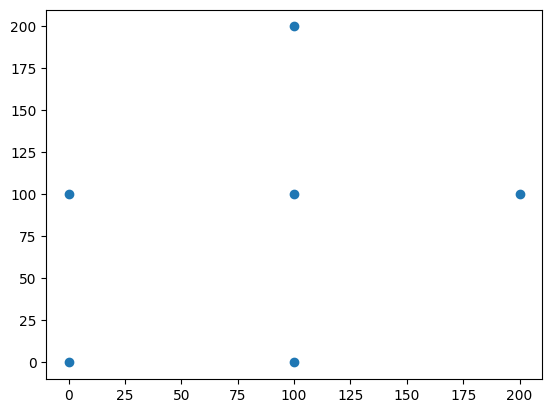

In [22]:
x = [x for (x,y) in points]
y = [y for (x,y) in points]
plt.scatter(x,y)
plt.show()

In [23]:
from __future__ import print_function
from CGAL.CGAL_Kernel import Point_2
from CGAL.CGAL_Voronoi_diagram_2 import Voronoi_diagram_2
from CGAL.CGAL_Voronoi_diagram_2 import Voronoi_diagram_2_Halfedge_handle

In [25]:
# Creating a data structure suitable for CGAL input for Voronoi diagram
sites = [Point_2(x,y) for (x,y) in points]
print("The sites are:")
for site in sites:
    print(site)

The sites are:
0 0
100 0
100 100
0 100
200 100
100 200


### Querying the Voronoi Diagram

In [30]:
vd = Voronoi_diagram_2(sites)

In [31]:
# To print the information computed by the voronoi diagram
def print_query_type(vd, query_point):
    """
    Prints the type of the query point
    """
    lr = vd.locate(query_point)
    if lr.is_vertex_handle():
        print(" is on a vertex.")
    elif lr.is_halfedge_handle():
        print(" is on an edge.")
    elif lr.is_face_handle():
        print(" is in a face.")
    else:
        print(" could not be located.") # more like doesn't exist

In [32]:
query_point_0 = sites[0]
print("The query point, ({})".format(query_point0), end='')
print_query_type(vd, query_point_0)

The query point, (0 0) is in a face.


In [34]:
def print_endpoint(e, is_src):
    """
    Prints the end point of an edge e of the voronoi diagram
    If is_src, then also the start point of e is printed
    """
    print("\t", end="")
    if is_src:
        if e.has_source():
            print(e.source().point())
        else:
            print("Point at infinity")
    else:
        if e.has_target():
            print(e.target().point())
        else:
            print("Point at infinity")
        
def print_vertices(vd, query_point):
    """
    Prints the vertices of a query point that is in a face of the voronoi diagram
    """
    lr = vd.locate(query_point)
    if not lr.is_face_handle():
        print('The query point is not in a face')
    else:
        f = lr.get_face_handle()
        print("The vertices of the Voronoi face are (in CCW order):")
        ec_start = f.outer_ccb()
        if ec_start.hasNext():
            done = ec_start.next()
            iter = Voronoi_diagram_2_Halfedge_handle()
            while True:
                iter = ec_start.next()
                print_endpoint(iter, False)
                if iter == done:
                    break

In [37]:
query_point_1 = sites[2]
print("The query point, ({})".format(query_point_1), end="")
print_query_type(vd, query_point_1)
print_vertices(vd, query_point_1)

The query point, (100 100) is in a face.
The vertices of the Voronoi face are (in CCW order):
	150 50
	150 150
	50 150
	50 50


This is a good exercise to verify the vertices and edges of the CGAL implementation using matplotlib.

Similarly in Python itself we have al inbuilt function for Voronoi diagram called Voronoi within the scipy library

# Dynamic Voronoi Diagrams

In [5]:
class Dot:
    def __init__(self, position, color, radius):
        self.position = position
        self.color = color
        self.radius = radius
        self.direction = (np.random.rand(2) - 0.5)
        self.noise = Perlin(6789)

    def update(self, ax):
        self.position += self.direction

        if random.random() > 0.8:
            self.rotate_direction()

        display_width, display_height = ax.get_xlim()[1], ax.get_ylim()[1]
        if self.position[0] < 0:
            self.position[0] = 0
            self.direction[0] *= -1
        if self.position[0] > display_width:
            self.position[0] = display_width
            self.direction[0] *= -1
        if self.position[1] < 0:
            self.position[1] = 0
            self.direction[1] *= -1
        if self.position[1] > display_height:
            self.position[1] = display_height
            self.direction[1] *= -1

        ax.scatter(*self.position, c=[self.color], s=100, edgecolors='black')

    def rotate_direction(self):
        rand_angle = self.noise.one(np.random.randint(100)) / 100
        x = self.direction[0] * math.cos(rand_angle) - self.direction[1] * math.sin(rand_angle)
        y = self.direction[0] * math.sin(rand_angle) + self.direction[1] * math.cos(rand_angle)
        self.direction = [round(x, 2), round(y, 2)]

MovieWriter imagemagick unavailable; using Pillow instead.


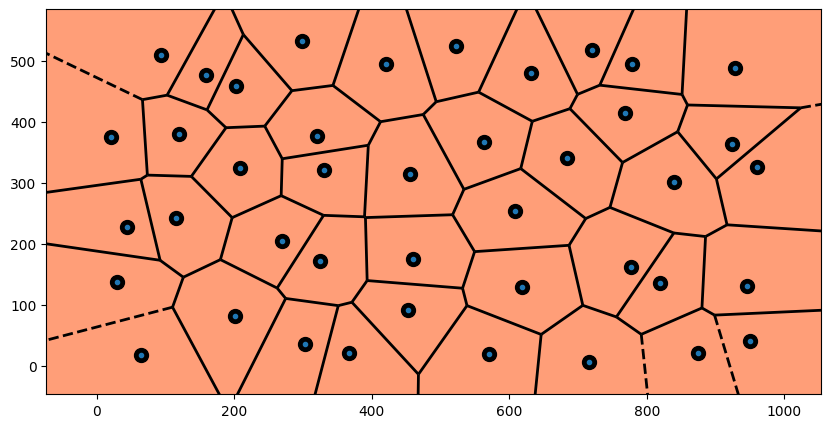

MovieWriter imagemagick unavailable; using Pillow instead.


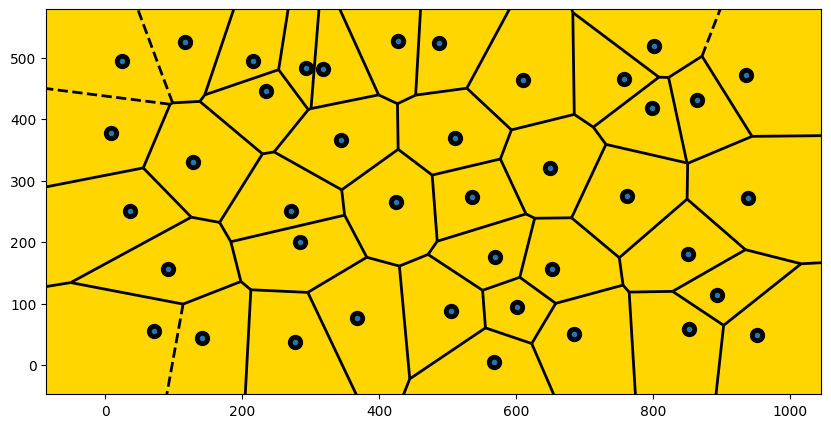

MovieWriter imagemagick unavailable; using Pillow instead.


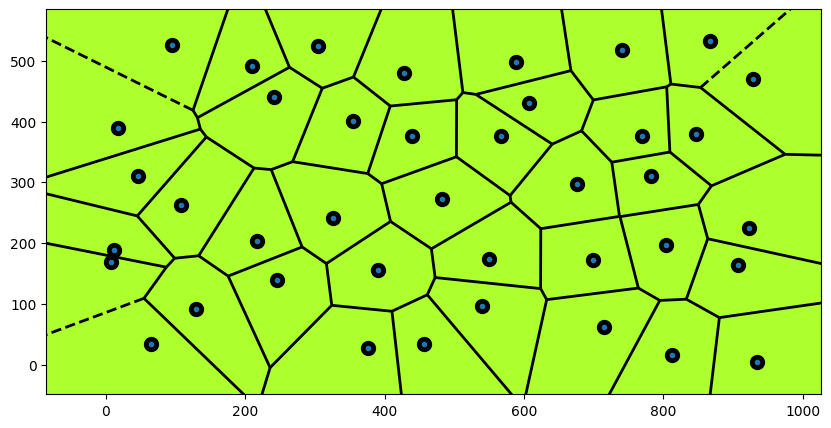

MovieWriter imagemagick unavailable; using Pillow instead.


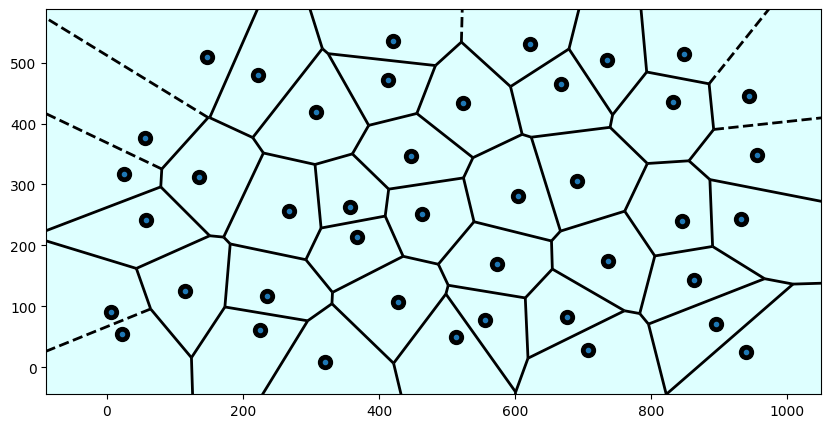

MovieWriter imagemagick unavailable; using Pillow instead.


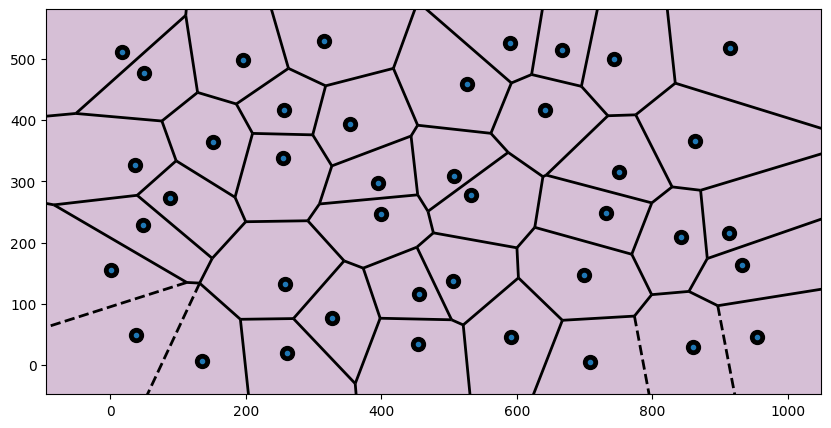

In [49]:
# SETTINGS
n_dots = 50
background_color = [(1,0.62,0.47), (1,0.84,0), (0.68,1,0.18), (0.87,1,1), (0.84,0.75,0.84)] *3
dots_color = (0, 0, 0)
min_distance = 100  # Minimum distance between dots

# Display part
display_width = 960
display_height = 540

def generate_random_dots(num_dots = n_dots, max_attempts=1000):
    dots = []
    for _ in range(num_dots):
        attempts = 0
        while attempts < max_attempts:
            new_dot = Dot((random.uniform(0, display_width), random.uniform(0, display_height)), dots_color, 1)
            if all(np.linalg.norm(np.array(new_dot.position) - np.array(dot.position)) >= min_distance for dot in dots):
                dots.append(new_dot)
                break
            attempts += 1
    return dots

for alpha in range(10,15):
    dots = generate_random_dots()
    vor = Voronoi([dot.position for dot in dots])

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlim(0, display_width)
    ax.set_ylim(0, display_height)
    ax.set_facecolor(background_color[alpha])

    def update(frame):
        ax.clear()
        ax.set_xlim(0, display_width)
        ax.set_ylim(0, display_height)
        ax.set_facecolor(background_color[alpha])

        for dot in dots:
            dot.update(ax)

        vor = Voronoi([dot.position for dot in dots])
        voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors=dots_color, line_width=2)

    anim = FuncAnimation(fig, update, frames=range(100), interval=200)

    # Save the animation as a GIF
    anim.save('C:\\Users\\Dell\\Desktop\\Courses\\Sem_V\\CompAlgo\\Project_Submission\\Generated Images\\Dynamic_Voronoi\\Example_{}.gif'.format(alpha), writer='imagemagick', fps=20)

    plt.show()


# Tools for implementation

1. Numpy
2. Matplotlib, specifically funcAnimation for dynamic visuals
3. Tkinter for Graphic User Interface
4. Perlin to introduce noise in terms of direction of rotation and movement of points
5. CGAL to do a qualitative analysis

# Future work

Dynamic Voronoi methods could be employed for analyzing the binding sites of proteins, particularly in molecular
dynamics simulations.